In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
%matplotlib inline


In [22]:
count_df=pd.read_table('Combined-counts.tab', index_col='transcript')
count_df


,SRR1976948,SRR1977249
transcript,,
PMFNBPKP_00001,44.31650,44.451700
PMFNBPKP_00002,12.79020,11.895600
PMFNBPKP_00003,13.84040,108.442000
PMFNBPKP_00004,25.02030,93.657400
PMFNBPKP_00005,19.31350,5.258890
PMFNBPKP_00006,3.30269,2.177950
PMFNBPKP_00007,9.76436,2.797300
PMFNBPKP_00008,12.46150,3.926180
PMFNBPKP_00009,504.92100,357.856000


In [26]:
count_df.mean(axis=1)
count_df.std()

SRR1976948    410.722057
SRR1977249    371.718084
dtype: float64

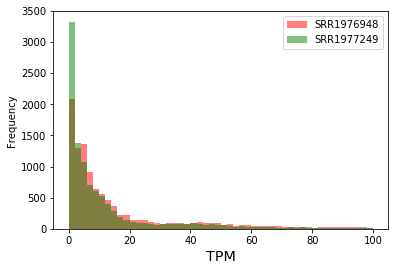

In [37]:
fig, ax = plt.subplots(1) #set up a figure and axis handle
count_df.plot(kind='hist', ax=ax, range=[0,100], 
              bins=50, alpha =0.5, color=['r','green']) #plot histogram
ax.set_xlabel('TPM', fontsize='x-large')

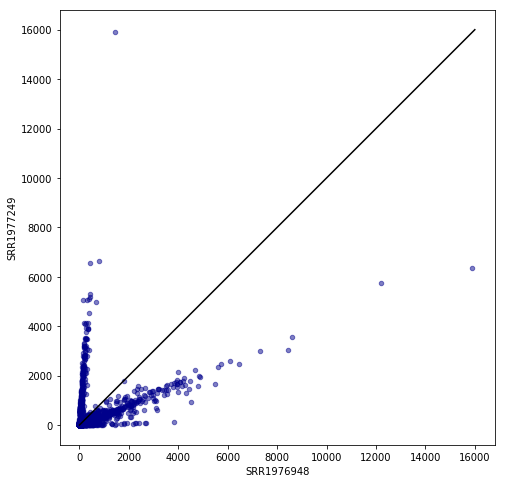

In [54]:
fig, ax = plt.subplots(1) #set up a figure and axis handle
fig.set_size_inches(8,8)

ax.set_aspect('equal')
count_df.plot(kind='scatter', x='SRR1976948', y='SRR1977249', 
              ax=ax, alpha=0.5, color='darkblue', s=20) #plot scatter plot

ax.plot([0,16000],[0,16000], color='k')

fig.savefig('scatterplot.pdf')

In [62]:
prokka_id=pd.read_table('metagG.tsv', index_col=0)
prokka_id.head()


,ftype,gene,EC_number,product
locus_tag,,,,
PMFNBPKP_00001,CDS,dhaT_1,1.1.1.202,"1,3-propanediol dehydrogenase"
PMFNBPKP_00002,CDS,NaN,NaN,hypothetical protein
PMFNBPKP_00003,CDS,proS_1,6.1.1.15,Proline--tRNA ligase
PMFNBPKP_00004,CDS,NaN,NaN,hypothetical protein
PMFNBPKP_00005,CDS,NaN,NaN,hypothetical protein


In [68]:
ecNum='1.1.1.202' #choose an ec number you are interested in
subset=prokka_id[prokka_id['EC_number']==ecNum]
idlist=subset.index

ecNum2='6.1.1.15' #choose an ec number you are interested in
subset2=prokka_id[prokka_id['EC_number']==ecNum2]
idlist2=subset2.index

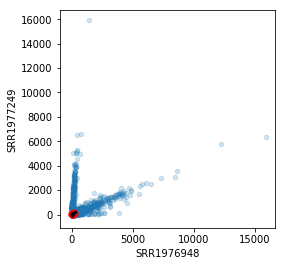

In [70]:
counts_sub=count_df.loc[idlist]
counts_sub2=count_df.loc[idlist2]

fig,ax=plt.subplots(1)
ax.set_aspect('equal')
count_df.plot(kind='scatter', x='SRR1976948', y='SRR1977249', 
              ax=ax, alpha=0.2, s=20) #plot scatter plot
counts_sub.plot(kind='scatter',x='SRR1976948', y='SRR1977249', 
                ax=ax, color='red', s=50)
counts_sub2.plot(kind='scatter',x='SRR1976948', y='SRR1977249', 
                ax=ax, color='black', s=5)

In [71]:
counts_prokka=count_df.merge(prokka_id, left_index=True, 
                             right_index=True).dropna()
mean=counts_prokka.groupby('EC_number').mean().dropna()
std=counts_prokka.groupby('EC_number').std().dropna()


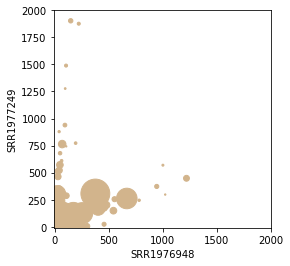

In [76]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.set_xlim(-10,2000)
ax.set_ylim(-10,2000)
mean.plot(kind='scatter',x='SRR1976948', y='SRR1977249', 
          s=std, c='tan', ax=ax)


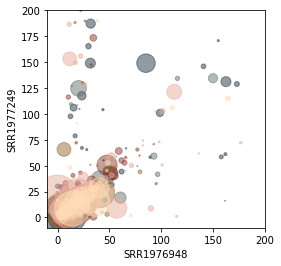

In [84]:
# Plot these data with colors
# Color the points by the first number of the EC Number
mean['EC_first']=mean.reset_index()['EC_number'].str[0]
test=mean.reset_index()['EC_number'].str[0]
test.index=mean.index
mean['EC_first']=test #list that we will color

# Set the color map
EC_First=list(set(mean['EC_first']))
cdict={}
mycolors=pal.wesanderson.GrandBudapest3_6_r.hex_colors
for i, ec in enumerate(EC_First):
    cdict[ec]=mycolors[i]

mean.replace({'EC_first':cdict}, inplace=True) #replace with color map
# plot
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.set_xlim(-10,200)
ax.set_ylim(-10,200)


for index, group in mean.groupby('EC_first'):
    group.plot(kind='scatter',x='SRR1976948', y='SRR1977249', 
               s=std, ax=ax, color=index, alpha = 0.5)

fig.savefig('scatter-art.pdf')

In [79]:
mean

,SRR1976948,SRR1977249,EC_first
EC_number,,,
1.-.-.-,19.205424,33.046015,#BEAED4
1.1.1.-,11.921598,6.228357,#BEAED4
1.1.1.1,7.691110,33.229100,#BEAED4
1.1.1.100,17.865214,72.108726,#BEAED4
1.1.1.103,10.332898,116.259113,#BEAED4
1.1.1.122,8.295530,3.484450,#BEAED4
1.1.1.127,17.578400,12.149400,#BEAED4
1.1.1.133,5.427790,2.019710,#BEAED4
1.1.1.136,2.856365,7.594635,#BEAED4
